# Objective:
To build a model to predict whether an individual is at risk of diabetes or not.

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. Even though it's incurable, it can be managed by treatment and medication.

# DataSet Description:
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skinfold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.

Age: Age in years

Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

# Objective of this project is to make models for predicting diabetes among women and compare the performance of different models.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("F:\diabetes.csv")
df=data.copy()
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns') # fstring 

There are 768 rows and 9 columns


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

there are no categorical variables other than the target variable. Target variable is outcome. all other variables are numerical in nature. BMI and Diabetes Pedigree Function are of float data type

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Data set contains women with an average of 4 pregnancies and maximum of 17.

Glucose, Blood pressure, Skin thickness, Insulin and BMI has zero values which are not possible. so we need to do the structuring and manipulation before building the models.

Difference between maximum value for features like SkinThickness, Insulin and Age and 3rd quartile which suggest ,there might be outliers present in the data.

Average age of women in the dataset is 33 years and maximum is 81.

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the data set

# Univariate analysis on the data set

In [9]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="darkgrid")
    sns.set_palette(sns.color_palette("Set2", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set2", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

C:\Users\aniru\AppData\Local\Temp\ipykernel_9068\1051685449.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,ax=ax_dis)
C:\Users\aniru\AppData\Local\Temp\ipykernel_9068\1051685449.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=False,ax=ax_dis)
C:\Users\aniru\App

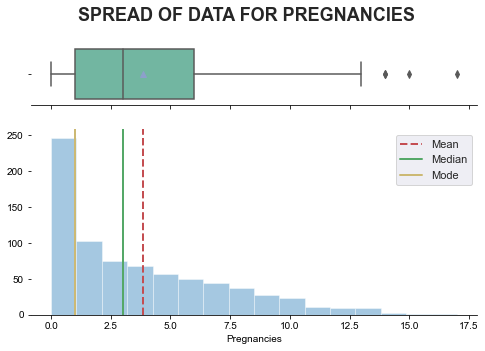

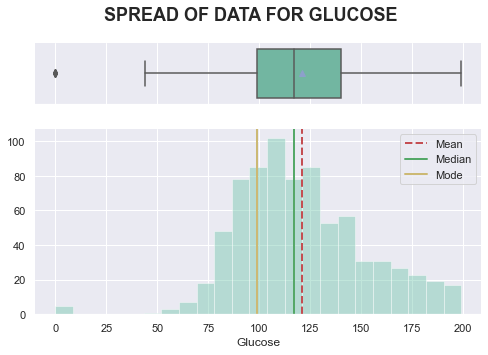

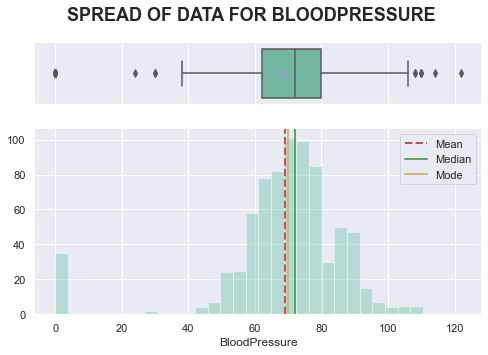

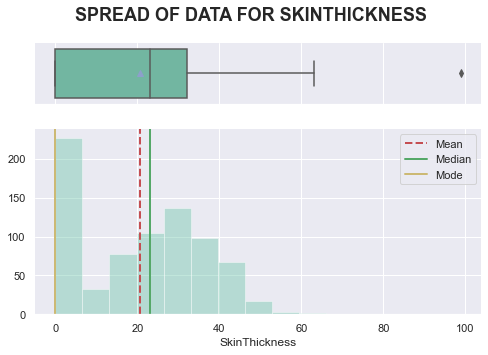

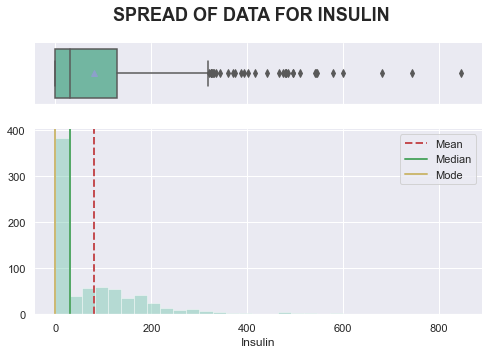

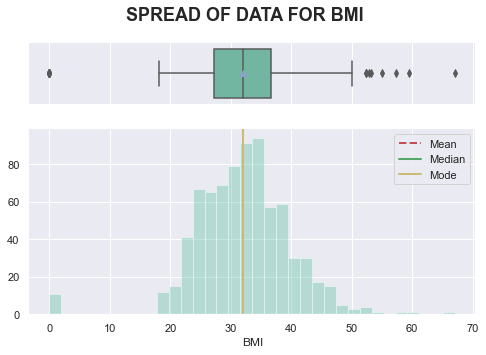

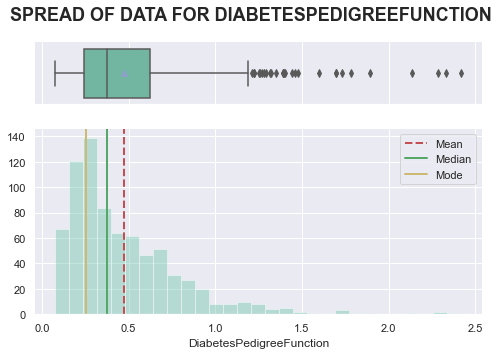

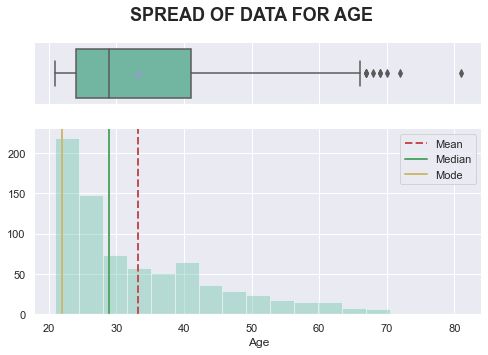

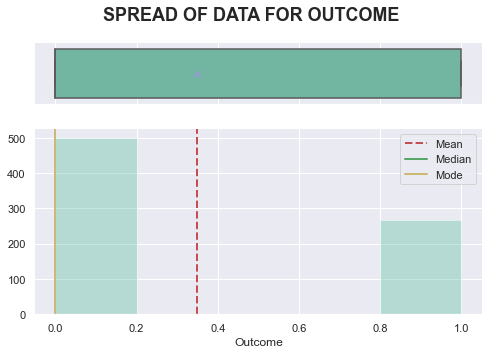

In [11]:
#select all quantitative columns for checking the spread
list_col= data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

Number of pregnancies is right-skewed.The boxplot shows that there are few outliers to the right. mean of pregnancy is 4

Glucose is almost normally distrubted. 0 value is an outlier for this variable.

The distribution for blood pressure looks fairy normal except few outliers evident from the boxplot. We can see some observations with 0 blood pressure but a 0 value of blood pressure is not possible and we should treat the 0 value as missing data. Most of the women have normal blood pressure.

There is one extreme value of 99 in Skin thickness, many value with 0 value of skin thicknessand we should treat the 0 values as missing data.

Insulin is right-skewed. There are some outliers to the right. A 0 value in insulin is not possible. We should treat the 0 values as missing data.75% of women have less than 127 mu U/ml of insulin concentration and an average of 79 mu U/ml.

BMI is normally distributed with the mean and median of approximately 32.There are some outliers in this variable. A 0 value in BMI is not possible we should treat the 0 values as missing data.

Diabetes pedigree function is skewed to the right and there are some outliers in this variable.

Age is right-skewed.There are outliers on the right side.

The outcome variable has 500 observations for class 1 and 268 observations for class 0 

In [12]:
zero_counts = df.eq(0).sum()

In [13]:
zero_counts 

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Glucose, Blood pressure, Skin thickness, Insulin and BMI has zero values 5, 35, 227, 374 and 11 respectively. we need to fill these values for our analysis.

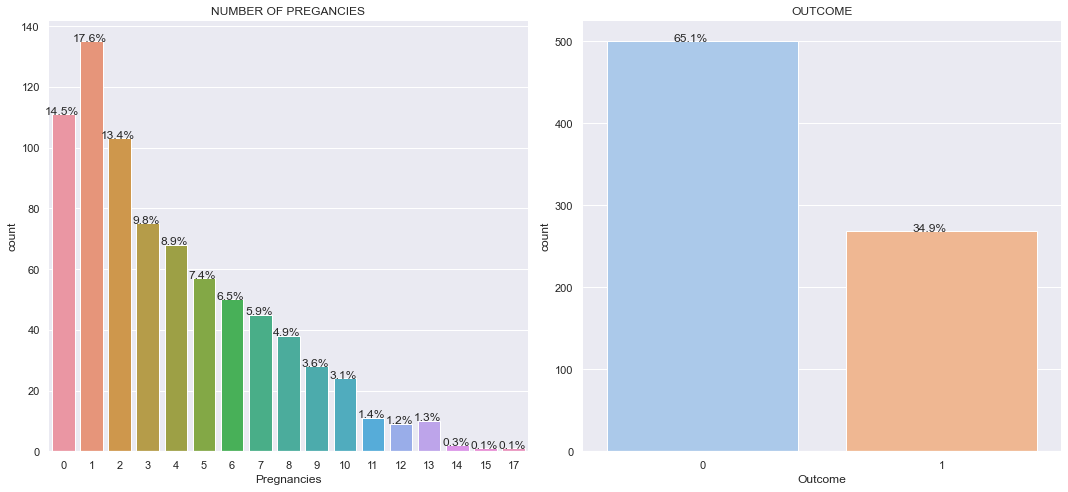

In [14]:
# Making a list of all categorical variables
cat_columns = ['Pregnancies','Outcome']
title=['Number of Pregancies','Outcome']
plt.figure(figsize=(15,7))

sns.set_theme(style="darkgrid") # just trying to make visualisation better. This will set background to white
for i, variable in enumerate(cat_columns):
                     plt.subplot(1,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('pastel')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

The data is slightly imbalanced as there are only ~35% of the women in data who are diabetic and ~65% of women who are not diabetic.

The most common number of pregnancies amongst women is 1.

Surprisingly, there are many observations with more than 10 pregnancies.

# Bivariate analysis on the data set

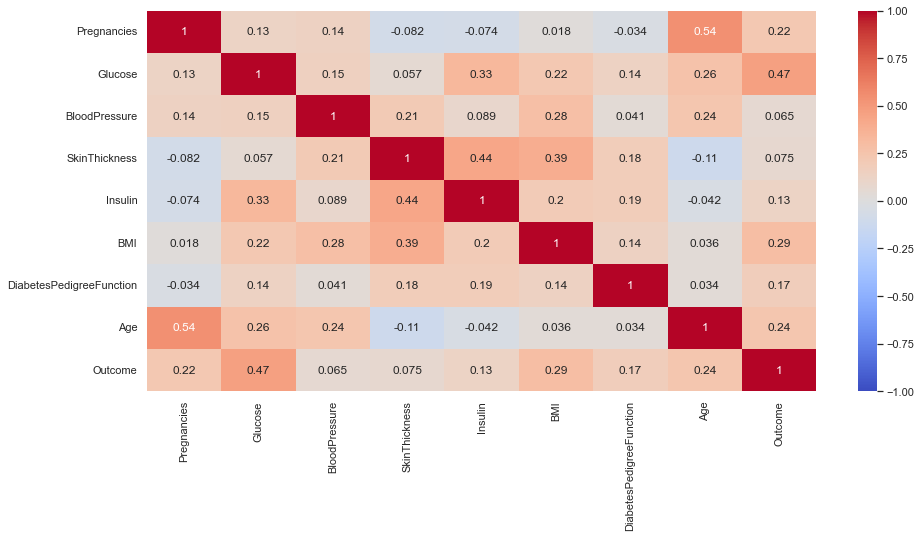

In [15]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

Age and No of pregnancies are moderately positively correlated with a value of 0.54.

Glucose and the outcome variable are also moderately positively correlated with a value of 0.47.

Insulin and BMI are positively correlated with Skin thickness with values 0.44 and 0.39 respectively.

None of the variables have significant negative correlation with any of these variables.

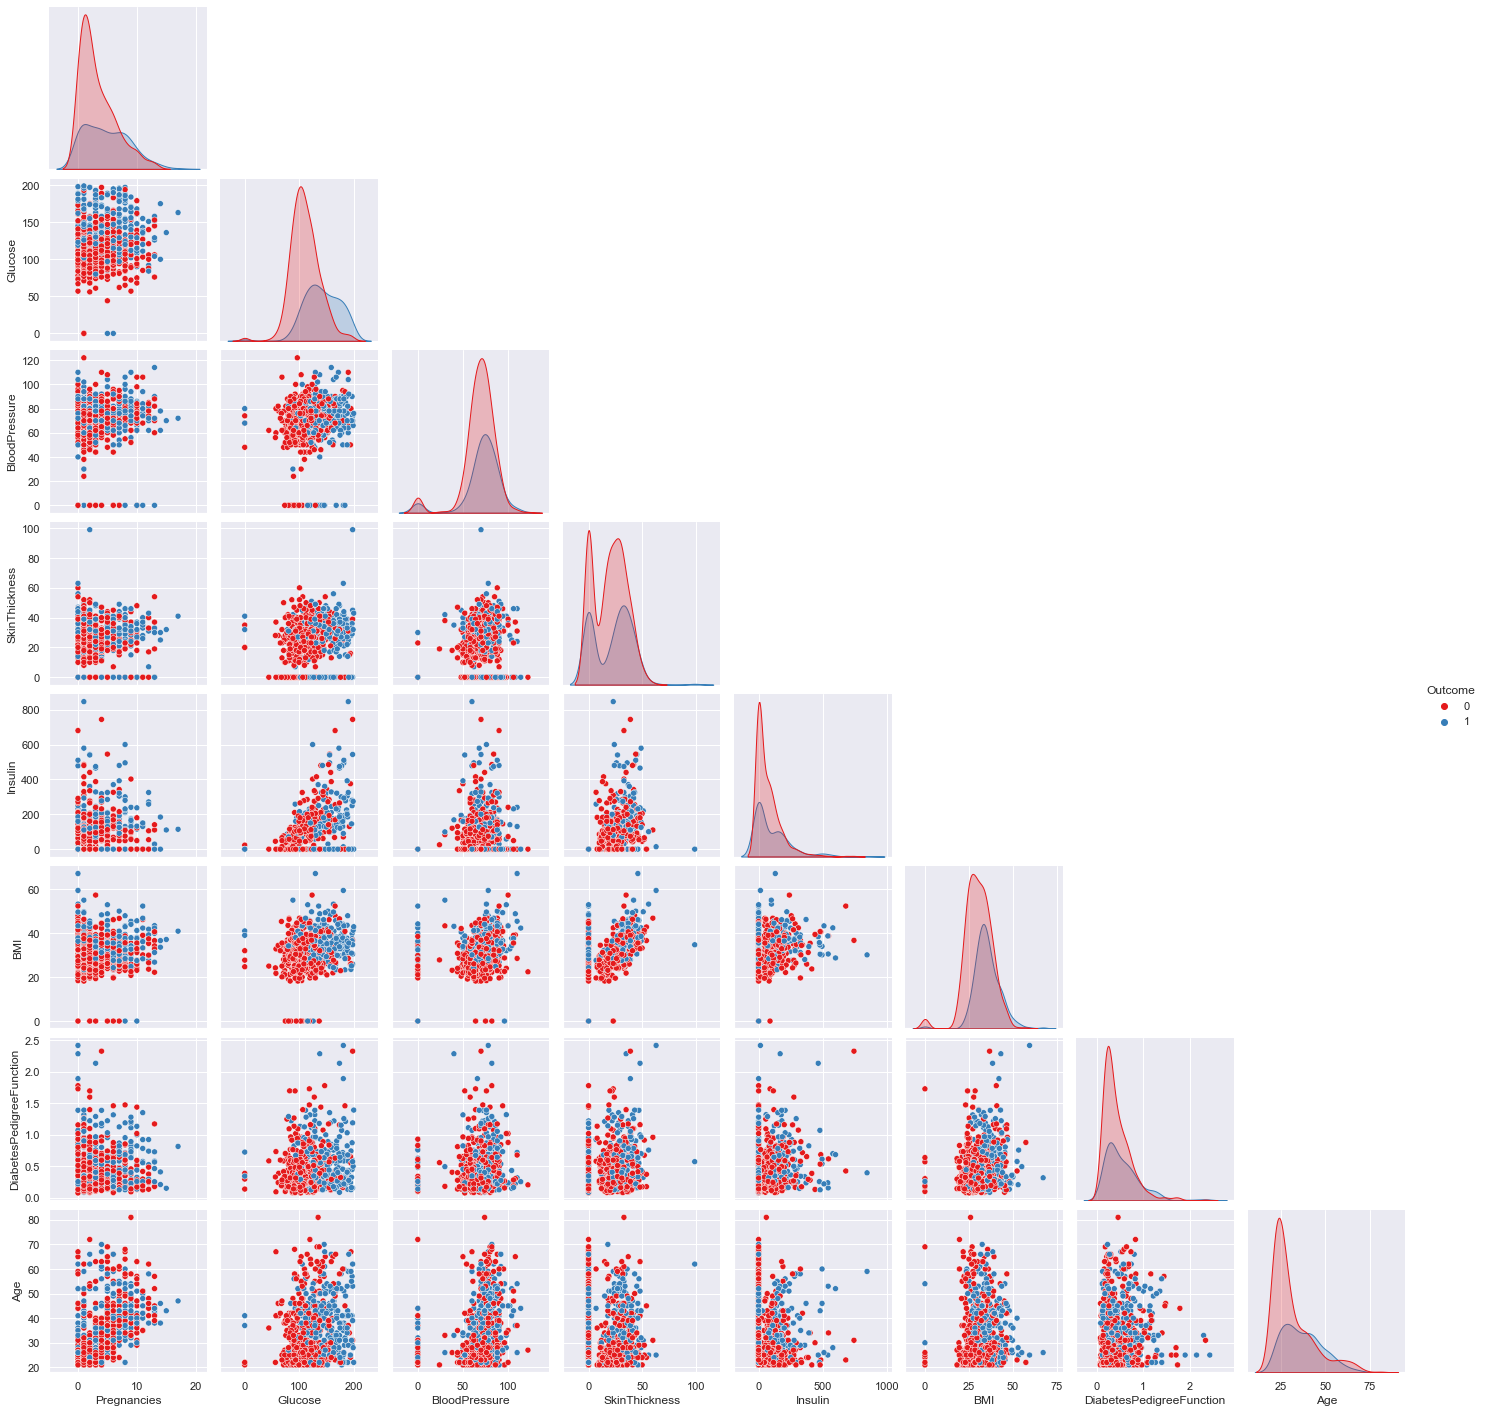

In [16]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=df,hue="Outcome", corner=True)
plt.show()

We can see that most non-diabetic persons have glucose concentration less than or equal to 100 and BMI is less than or equal to 30

# Analysing the distribution of each variable in each of the classes

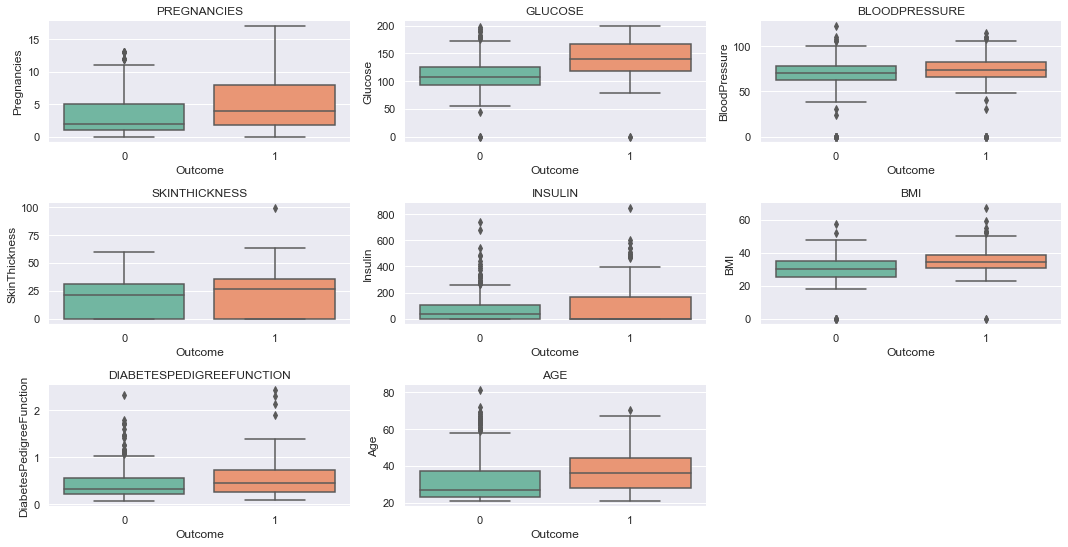

In [17]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Outcome',y= df[variable], data=df)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

Diabetes is more prominent in women with more number of pregnancies.

Higher glucose concentration is seen in Women with diabetes compared to the women without diabetes.

There is not much difference between the blood pressure levels of a diabetic and a non-diabetic person. both the distributions are similar

Skin thickness doesnt seem to play any significant role in likelihood of diabetes because both of the distributions are similar in both the classes. There is one outlier with very high skin thickness in diabetic patients

Higher levels of insulin is found in women having diabetes compared to the women doesnt have diabetes.

Women with diabetes have higher BMI.

Diabetic women have higher diabetes pedigree function value suggesting this variable matters in terms of diabetes.

Age does play an important role,Diabetes is more prominent in middle age to older aged women.


# Handling the missing values

Filling all the 0 values with the respective median of that variable. since we have some outliers in our data median is preffered over mean

In [18]:
df.loc[df.Glucose == 0, 'Glucose'] = df.Glucose.median()
df.loc[df.BloodPressure == 0, 'BloodPressure'] = df.BloodPressure.median()
df.loc[df.SkinThickness == 0, 'SkinThickness'] = df.SkinThickness.median()
df.loc[df.Insulin == 0, 'Insulin'] = df.Insulin.median()
df.loc[df.BMI == 0, 'BMI'] = df.BMI.median()

In [19]:
zero_counts1 = df.eq(0).sum()

In [20]:
zero_counts1

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Now we dont have any zero values in Glucose, Blood pressure, Skin thickness, Insulin and BMI. 

With this data we can start build our model 

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


# Splitting the data

In [22]:
# Library to split data 
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop('Outcome',axis=1)
y = data['Outcome'] 

In [24]:
# Splitting data into training and test set:
#The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


In [25]:
y_test.value_counts(1)

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

# Building Model

# 1. LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

*** Model evaluation criterion

Model can make wrong predictions as:
Predicting a person doesn't have diabetes when in reality the person has diabetes.[False Negative, undiagnosed illness]
Predicting a person has diabetes, when in reality the person doesn't have diabetes.[False Postive, require more Testing]

*** Which case is more important?

Predicting a person doesn't have diabetes, when in reality the person has diabetes is a bigger risk.The person will go undiagnosed resulting into severe helath impact.

*** Which metric to optimize?

We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes when in reality the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

In [27]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.71      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

Confusion Matrix:
 [[132  18]
 [ 36  45]]


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy

0.77 accuracy score indicates that a large portion (77%) of predictions are correct. However, accuracy can be misleading when classes are imbalanced because a model that always predicts the majority class can still achieve a high accuracy.

Precision

Precision measures the accuracy of the positive class predictions since it is binary logistic regression.
Precision is 0.79 for 0 class, it means that 79% of the people predicted as not diabetic were actually not diabetic.
Precision is 0.71 for 1 class, it means that 71% of the people predicted as diabetic were actually diabetic.

Recall

Recall measures the model's ability to correctly identify all instances of the positive class(Binary class).
Recall is 0.88 for class 0 it means that the model correctly identified 88% of the actual Non diabetic people.
Recall is 0.56 for class 1 it means that the model correctly identified 56% of the actual Diabetic people.
A higher recall value for 0 class is due to the majority of class 0 in the data set.

F-1 Score

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when you need to consider both false positives and false negatives.
the F1-score is 0.63 for class 1, it indicates a moderate balance between making accurate positive predictions and capturing all actual diabetic people.
the F1-score is 0.83 for class 0, it indicates a good balance between making accurate negative predictions and capturing all actual non diabetic people.

Overall we can say that the model was able to predict the non diabetic people more than the diabetic people. so our model is not that good interms of its performance since we are more interested in positive predictions(class 1).


# For a better model we can standardize our input variables and can make a model using those standardised variables.

In [28]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))


In [29]:
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

In [56]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Reds',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(visible=True, which='both', axis='both', color='gray', linestyle='--')
    plt.show()

In [57]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    model : classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",round(train_acc,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",round(test_acc,3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m",round(train_recall,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" , round(test_recall,3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m", round(train_precision,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ", round(test_precision,3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",round(train_f1,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m", round(test_f1,3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [58]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add score to list for comparision'''  
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# Fitting the model (unscaled data)

C:\Users\aniru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 MODEL PERFORMANCE
 Accuracy   : Train: 0.78  Test:  0.766
 Recall     : Train: 0.594  Test: 0.556
 Precision  : Train: 0.725  Test:  0.714
 F1         : Train: 0.653  Test: 0.625


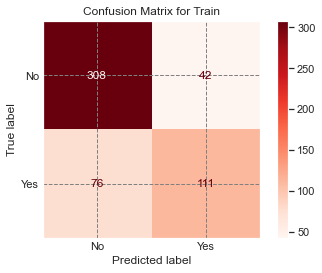

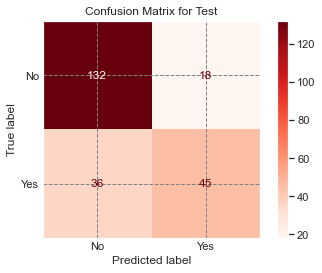

In [60]:
#Fitting the model (un scaled data)
model1 = LogisticRegression()
model1.fit(X_train,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model1,X_train,X_test,y_train,y_test)

# Fitting the model (scaled data)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.784  Test:  0.762
 Recall     : Train: 0.594  Test: 0.531
 Precision  : Train: 0.735  Test:  0.717
 F1         : Train: 0.657  Test: 0.61


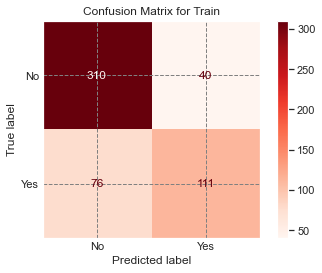

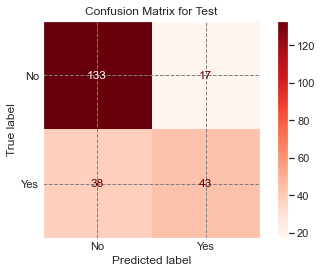

In [61]:
#Fitting the model (scaled data)
model2 = LogisticRegression()
model2.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model2,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

both the models have accuracy for test data in the range 76-77 %. this means 77% of the total predictions are right. this includes both positive and negative instances.

Recall is very important in these kind of models because missing a positive case is costly. recall tells you how many of the actual positive cases were correctly identified. here both the models have recall value in the range 53-55 % on test data.

Precision tells you how many of the predicted positive cases are actually true positives. both the models have a value 71 for test data.

From the confusion matrix of test data, we can say that the number of false negatives increased after the standard scaling that means there is no significant improvment becuase of scaling whne we use simple logistic regression. there is only a slight change for all the performance metrics.

Both the models for scaled and unscaled data have different performances but they are camparable. So from now on each model will be tested with both kind of data, scaled and unscaled 

# 2. DECISION TREE

In [62]:
from sklearn.tree import DecisionTreeClassifier

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.63
 Precision  : Train: 1.0  Test:  0.614
 F1         : Train: 1.0  Test: 0.622


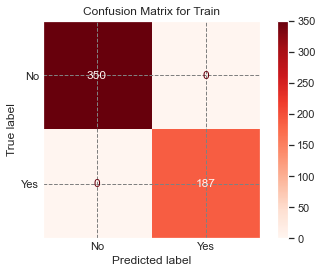

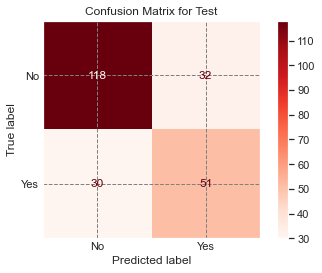

In [63]:
#Fitting the model (un scaled data)
model3= DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
model3.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model3,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.605
 Precision  : Train: 1.0  Test:  0.62
 F1         : Train: 1.0  Test: 0.612


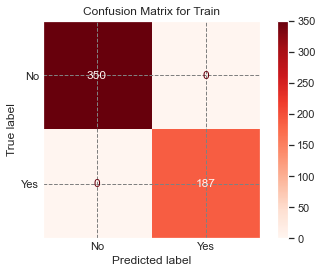

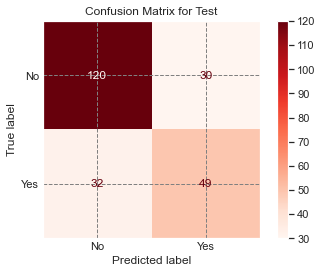

In [64]:
#Fitting the model (scaled data)
model4= DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
model4.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model4,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

Compared to logistic regression, the performance of the model has increased when we use decision tree algoritham. both the decision tree models are overfitting with the train data but the number of false positive was reduced in test data for both the decision trees compared to its logistic models.

# Dealing with overfitting

1. By Limiting the Depth of the Tree (Pruning)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.821  Test:  0.714
 Recall     : Train: 0.866  Test: 0.679
 Precision  : Train: 0.695  Test:  0.579
 F1         : Train: 0.771  Test: 0.625


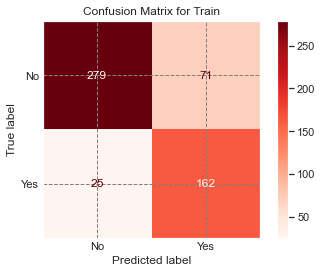

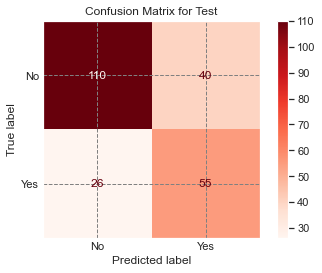

In [38]:
#Fitting the model (unscaled data)
model5= DecisionTreeClassifier(max_depth=4)

# Train the Decision Tree classifier on the training data
model5.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model5,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.821  Test:  0.714
 Recall     : Train: 0.866  Test: 0.679
 Precision  : Train: 0.695  Test:  0.579
 F1         : Train: 0.771  Test: 0.625


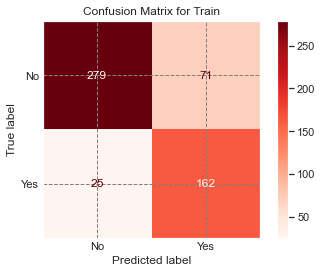

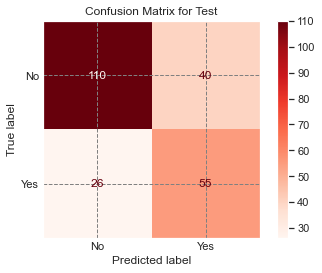

In [39]:
#Fitting the model (scaled data)
model6= DecisionTreeClassifier(max_depth=4)

# Train the Decision Tree classifier on the training data
model6.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model6,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

By limiting the depth of decision tree by 4, we were able to increse the performance of the model for both scaled and unscaled data. also the number of false negatives has decresed compared to other models 1,2,3 and 4.

2. By Limiting the Depth of the Tree (Pruning) and criterion as entropy

 MODEL PERFORMANCE
 Accuracy   : Train: 0.803  Test:  0.719
 Recall     : Train: 0.877  Test: 0.741
 Precision  : Train: 0.664  Test:  0.577
 F1         : Train: 0.756  Test: 0.649


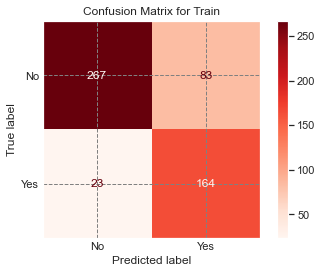

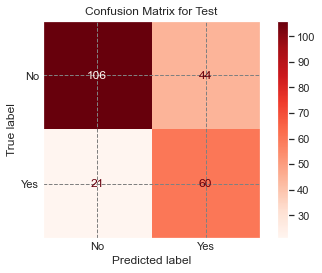

In [40]:
#Fitting the model (unscaled data)
model7= DecisionTreeClassifier(max_depth=4,criterion='entropy')

# Train the Decision Tree classifier on the training data
model7.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model7,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.803  Test:  0.732
 Recall     : Train: 0.877  Test: 0.753
 Precision  : Train: 0.664  Test:  0.592
 F1         : Train: 0.756  Test: 0.663


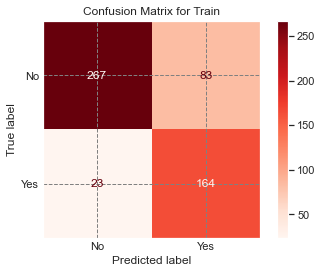

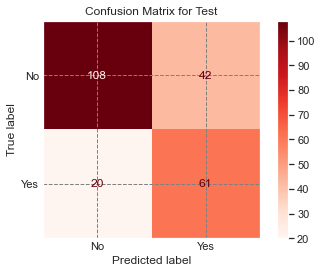

In [41]:
#Fitting the model (scaled data)
model8= DecisionTreeClassifier(max_depth=4,criterion='entropy')

# Train the Decision Tree classifier on the training data
model8.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model8,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

By default the decision tree algoritham chose gini impurity for the split. when we changed the criterion to entropy, the performance of the model has improved for test data and also the number of false negatives has reduced compared to all other models 1,2,3,4,5 and 6.

3. By Limiting the Depth of the Tree (Pruning), criterion as entropy and minimum samples per leaf as 10

 MODEL PERFORMANCE
 Accuracy   : Train: 0.799  Test:  0.727
 Recall     : Train: 0.866  Test: 0.741
 Precision  : Train: 0.661  Test:  0.588
 F1         : Train: 0.75  Test: 0.656


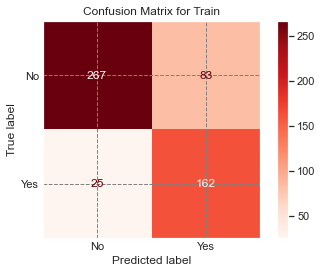

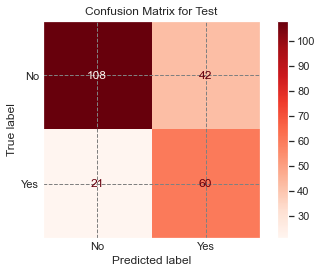

In [42]:
#Fitting the model (unscaled data)
model9= DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_leaf=10)

# Train the Decision Tree classifier on the training data
model9.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model9,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.799  Test:  0.727
 Recall     : Train: 0.866  Test: 0.741
 Precision  : Train: 0.661  Test:  0.588
 F1         : Train: 0.75  Test: 0.656


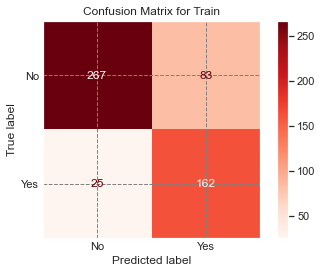

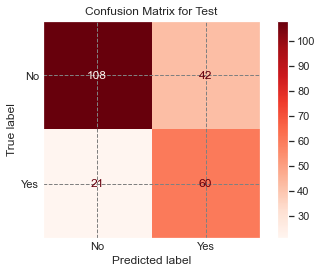

In [43]:
#Fitting the model (scaled data)
model10= DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_leaf=10)

# Train the Decision Tree classifier on the training data
model10.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model10,X_train_scaled_df,X_test_scaled_df,y_train,y_ertest)

There is no significant performance change in the model when we used minimum sample leaf as 10. the number of False negatives increased by 1 which is not good for the model.

IN all these model pairs (scaled and unscaled inputs), model pair 5 and 6 & model pair 7 & 8 has better performance compared to all other model pairs.

Accuracy is higher for model pair 5 & 6 with values 82 and 71 for train and test set. where as for model pair 7 & 8 with values 80 and 73 for train and test set.

But in these kind of problems recall is more important than the accuracy. in terms of recall model pair 7 & 8 has values  87 and 75 for train and test set. where as model pair 5 & 6 has values  86 and 67 for train and test set.

In [45]:
from sklearn.ensemble import RandomForestClassifier

# 3. Random Forest

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.736
 Recall     : Train: 1.0  Test: 0.519
 Precision  : Train: 1.0  Test:  0.656
 F1         : Train: 1.0  Test: 0.579


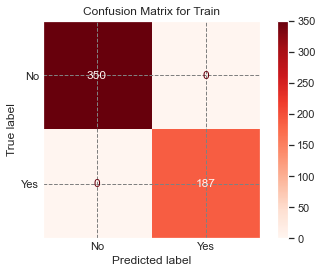

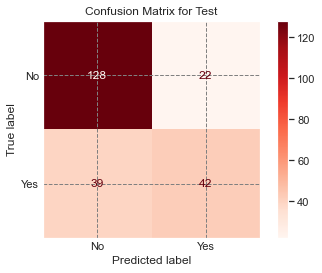

In [46]:
#Fitting the model (unscaled data)
model11= RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Decision Tree classifier on the training data
model11.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model11,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.727
 Recall     : Train: 1.0  Test: 0.506
 Precision  : Train: 1.0  Test:  0.641
 F1         : Train: 1.0  Test: 0.566


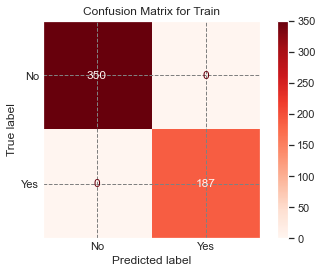

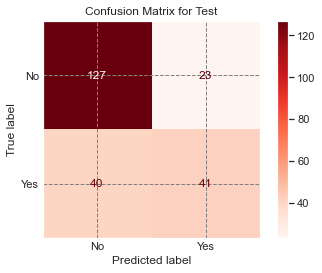

In [65]:
#Fitting the model (scaled data)
model12= RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Decision Tree classifier on the training data
model12.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model12,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.845  Test:  0.74
 Recall     : Train: 0.684  Test: 0.481
 Precision  : Train: 0.842  Test:  0.684
 F1         : Train: 0.755  Test: 0.565


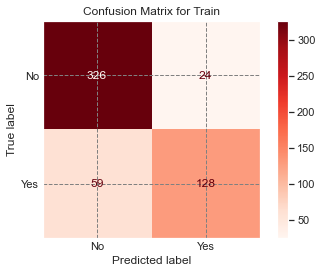

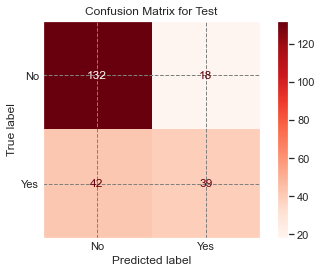

In [76]:
#Fitting the model (unscaled data)
model13= RandomForestClassifier(n_estimators=100,max_depth=4,random_state=42)

# Train the Decision Tree classifier on the training data
model13.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model13,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.845  Test:  0.74
 Recall     : Train: 0.684  Test: 0.481
 Precision  : Train: 0.842  Test:  0.684
 F1         : Train: 0.755  Test: 0.565


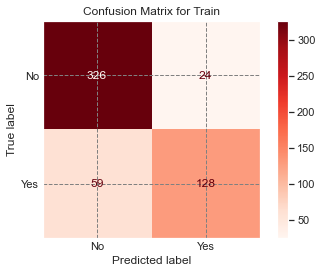

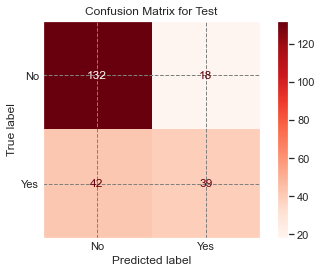

In [77]:
#Fitting the model (scaled data)
model14= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=42)

# Train the Decision Tree classifier on the training data
model14.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model14,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.97  Test:  0.727
 Recall     : Train: 0.941  Test: 0.494
 Precision  : Train: 0.972  Test:  0.645
 F1         : Train: 0.957  Test: 0.559


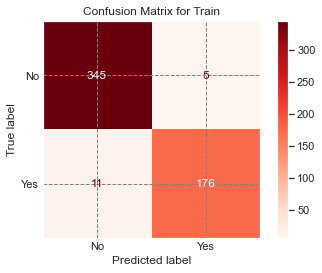

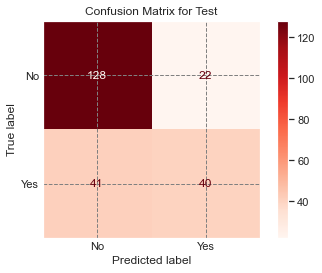

In [78]:
#Fitting the model (unscaled data)
model15= RandomForestClassifier(n_estimators=100,min_samples_leaf=2, min_samples_split=5,random_state=42)

# Train the Decision Tree classifier on the training data
model15.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model15,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.97  Test:  0.727
 Recall     : Train: 0.941  Test: 0.494
 Precision  : Train: 0.972  Test:  0.645
 F1         : Train: 0.957  Test: 0.559


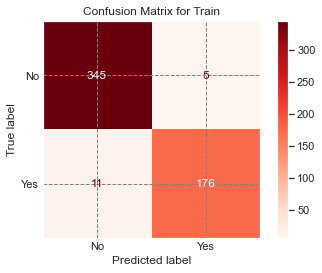

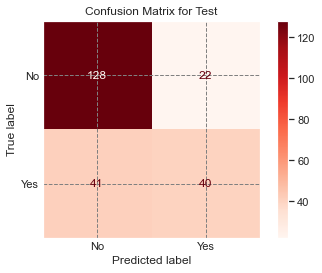

In [79]:
#Fitting the model (scaled data)
model16= RandomForestClassifier(n_estimators=100,min_samples_leaf=2, min_samples_split=5, random_state=42)

# Train the Decision Tree classifier on the training data
model16.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model16,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

When we use Random forest classifier, the acuuracy, precision and recall values of train set is increasing but the test set is performing bad. also the recall for the test set is very less compared to the best decision tree model.

By analysing all the models we can say that the best model is model pair 7 & 8 which use decision tree classifier.

-Accuracy is for model 7 & 8

train   80

test    71-73

-Recall is for model 7 & 8

train   87

test    74-75

-Precision is for model 5 & 6

train   66

test    57-59

# 4. XGBoost

It is an ensemble learning method that combines the predictions from multiple weak learners (typically decision trees) to create a strong predictive model.

In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
import xgboost as xgb

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.543
 Precision  : Train: 1.0  Test:  0.638
 F1         : Train: 1.0  Test: 0.587


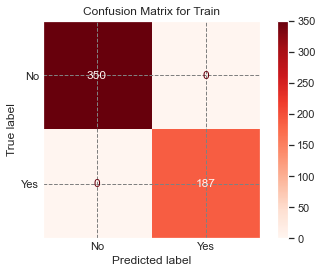

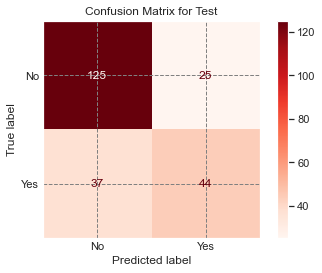

In [82]:
#Fitting the model (unscaled data)
model17= xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the Decision Tree classifier on the training data
model17.fit(X_train, y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model17,X_train,X_test,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.543
 Precision  : Train: 1.0  Test:  0.638
 F1         : Train: 1.0  Test: 0.587


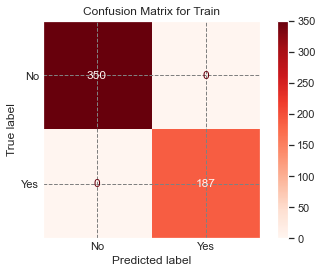

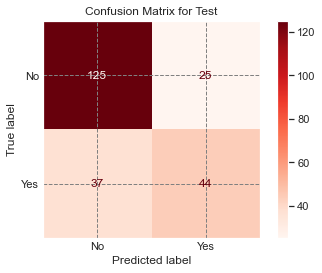

In [83]:
#Fitting the model (scaled data)
model18= xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the Decision Tree classifier on the training data
model18.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model18,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

Dealing with the overfitting

1. Using lasso regularization

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.74
 Recall     : Train: 1.0  Test: 0.543
 Precision  : Train: 1.0  Test:  0.657
 F1         : Train: 1.0  Test: 0.595


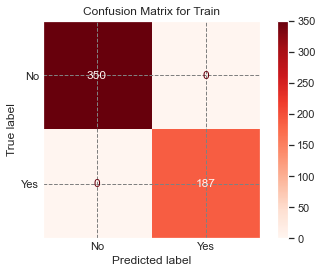

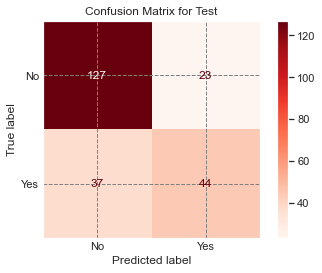

In [88]:
#Fitting the model (scaled data)
model19= xgb.XGBClassifier(objective="binary:logistic",alpha=0.1, random_state=42)

# Train the Decision Tree classifier on the training data
model19.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model19,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

2. Using column subsampling

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.543
 Precision  : Train: 1.0  Test:  0.638
 F1         : Train: 1.0  Test: 0.587


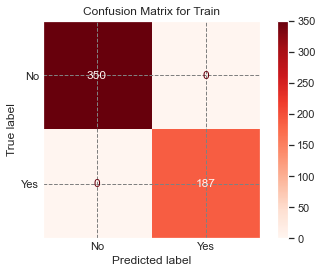

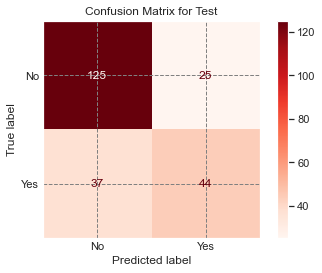

In [94]:
#Fitting the model (scaled data)
model20= xgb.XGBClassifier(objective="binary:logistic",colsample_bytree=0.8, colsample_bylevel=0.8, random_state=42)

# Train the Decision Tree classifier on the training data
model20.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model20,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

3. Using subsampling

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.727
 Recall     : Train: 1.0  Test: 0.519
 Precision  : Train: 1.0  Test:  0.636
 F1         : Train: 1.0  Test: 0.571


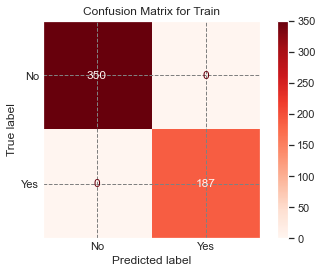

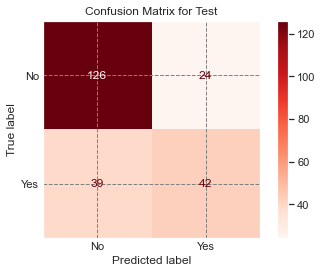

In [97]:
model21= xgb.XGBClassifier(objective="binary:logistic",subsample=0.8, random_state=42)

# Train the Decision Tree classifier on the training data
model21.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model21,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

4. Using minimum child weight

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.543
 Precision  : Train: 1.0  Test:  0.638
 F1         : Train: 1.0  Test: 0.587


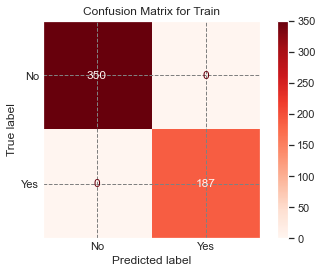

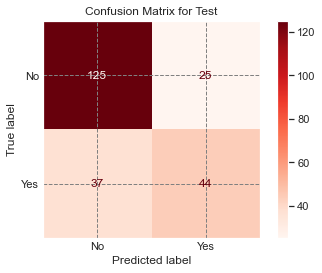

In [98]:
model22= xgb.XGBClassifier(objective="binary:logistic",min_child_weight=1,subsample=0.8, random_state=42)

# Train the Decision Tree classifier on the training data
model22.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model22,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.732
 Recall     : Train: 1.0  Test: 0.531
 Precision  : Train: 1.0  Test:  0.642
 F1         : Train: 1.0  Test: 0.581


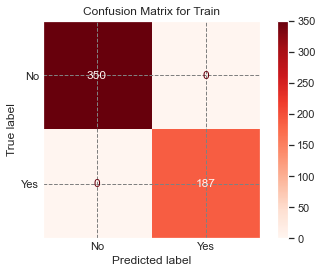

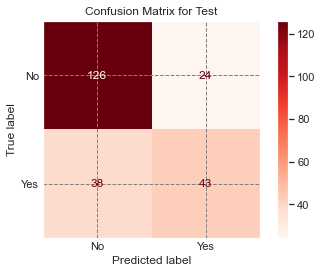

In [99]:
model23= xgb.XGBClassifier(objective="binary:logistic",min_child_weight=1,max_depth=4, random_state=42)

# Train the Decision Tree classifier on the training data
model23.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(model23,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

None of the models were able to undo the overfitting and improve performance.

By analysing all the models we can say that the best model is model pair 7 & 8 which use decision tree classifier